In [1]:
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
controlEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsControls.csv', sep=',', header=0).dropna()
controlEmbeddings = controlEmbeddingsWithId.drop(["id","pathway_id"],axis=1)
basalEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorBasal113New.csv', sep=',', header=0).dropna()
basalEmbeddingsWithIdFiltered = basalEmbeddingsWithId[~basalEmbeddingsWithId['pathway_id'].isin(set(basalEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
basalEmbeddings = basalEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumAEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumA113New.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered = LumAEmbeddingsWithId[~LumAEmbeddingsWithId['pathway_id'].isin(set(LumAEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings = LumAEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)
LumBEmbeddingsWithId = pd.read_csv('pathwayEmbeddingsTumorLumB113New.csv', sep=',', header=0).dropna()
LumBEmbeddingsWithIdFiltered = LumBEmbeddingsWithId[~LumBEmbeddingsWithId['pathway_id'].isin(set(LumBEmbeddingsWithId["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumBEmbeddings = LumBEmbeddingsWithIdFiltered.drop(["id","pathway_id"],axis=1)

In [3]:
controlEmbeddings

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,-0.001864,-0.001324,-0.000723,-0.003979,-0.011037,-0.007056,-0.002351,-0.004459,-0.021360,-0.008809,...,-0.000208,-0.002568,-0.002259,-0.007833,-0.001136,-0.008971,-0.001789,-0.001477,-0.001284,-0.004332
1,-0.002426,-0.001340,-0.001045,-0.004201,-0.012533,-0.008876,-0.002859,-0.005409,-0.024896,-0.010152,...,-0.000436,-0.002670,-0.002526,-0.009201,-0.001441,-0.009750,-0.001511,-0.001890,-0.001464,-0.005524
2,-0.002575,-0.001200,-0.001035,-0.003873,-0.010635,-0.007583,-0.002191,-0.004486,-0.021188,-0.008526,...,-0.000463,-0.003190,-0.001494,-0.007203,-0.001087,-0.009073,-0.001620,-0.001242,-0.001434,-0.004609
3,-0.003493,-0.000755,-0.001101,-0.004443,-0.007395,-0.004756,-0.001841,-0.001691,-0.017472,-0.006212,...,-0.000838,-0.002415,-0.001946,-0.003811,-0.000936,-0.010639,-0.001075,-0.000764,-0.001388,-0.003416
4,-0.003258,-0.001157,-0.001393,-0.004688,-0.009175,-0.005571,-0.001749,-0.002641,-0.019524,-0.007269,...,-0.000664,-0.003218,-0.001813,-0.005123,-0.000913,-0.010895,-0.001763,-0.000850,-0.001794,-0.003598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.002129,-0.001492,-0.000868,-0.004024,-0.011750,-0.007828,-0.002335,-0.004956,-0.022754,-0.009310,...,-0.000371,-0.003087,-0.001903,-0.008289,-0.001213,-0.009307,-0.001887,-0.001500,-0.001613,-0.004810
222,-0.003550,-0.001053,-0.001416,-0.004719,-0.008204,-0.004976,-0.001647,-0.002134,-0.018348,-0.006630,...,-0.000826,-0.002958,-0.001842,-0.004320,-0.001128,-0.011112,-0.001476,-0.000871,-0.001563,-0.003382
223,-0.002319,-0.001260,-0.001203,-0.003856,-0.009317,-0.005888,-0.001735,-0.003330,-0.018454,-0.007287,...,-0.000434,-0.002984,-0.001591,-0.005971,-0.000859,-0.008581,-0.001623,-0.000957,-0.001530,-0.003503
224,-0.002027,-0.000773,0.000668,0.002025,-0.013546,-0.008493,-0.004014,-0.007542,-0.023885,-0.010126,...,-0.000958,-0.002823,-0.002184,-0.010644,-0.000077,-0.009396,-0.000233,-0.002819,-0.003512,-0.006407


In [4]:
tfControlEmbeddings = tf.convert_to_tensor(controlEmbeddings)
tfBasalEmbeddings = tf.convert_to_tensor(basalEmbeddings)
tfLumAEmbeddings = tf.convert_to_tensor(LumAEmbeddings)
tfLumBEmbeddings = tf.convert_to_tensor(LumBEmbeddings)

In [5]:
@tf.function
def rows_distance(tfTensor1,tfTensor2):
    return tf.map_fn( lambda row: tf.sqrt(tf.reduce_sum(row)) ,tf.square(tfTensor1-tfTensor2))

distanceControlsBasal = rows_distance(tfControlEmbeddings,tfBasalEmbeddings)
distanceControlsBasal

<tf.Tensor: shape=(225,), dtype=float64, numpy=
array([0.05102236, 0.05793883, 0.05068939, 0.0482938 , 0.0533867 ,
       0.05445447, 0.05420121, 0.05351131, 0.05833311, 0.05695879,
       0.05713008, 0.05873609, 0.05956132, 0.05031698, 0.05986696,
       0.05735696, 0.06052642, 0.05243305, 0.05405716, 0.05607668,
       0.0453549 , 0.05457107, 0.05307125, 0.06000475, 0.04971051,
       0.05121637, 0.04202828, 0.05263373, 0.05346457, 0.04364339,
       0.05383574, 0.059683  , 0.06009216, 0.05348137, 0.05589556,
       0.05932123, 0.05481235, 0.05719169, 0.05492942, 0.05752124,
       0.04287684, 0.0495326 , 0.05006524, 0.04309571, 0.04413798,
       0.05530311, 0.04619548, 0.05879925, 0.0551271 , 0.05908296,
       0.05785828, 0.0536144 , 0.0545556 , 0.04513986, 0.05745059,
       0.05185167, 0.05503168, 0.04496893, 0.05165999, 0.0395597 ,
       0.04403851, 0.05816391, 0.0571052 , 0.06160228, 0.05659465,
       0.05551402, 0.05948753, 0.05417977, 0.05441536, 0.05345868,
       0.05239

In [6]:
test1 = tf.constant([[1.0,2.0,5.0],[5.0,2.0,8.0]],dtype=tf.float64)
test2 = tf.constant([[5.0,2.0,5.0],[8.0,2.0,5.0]],dtype=tf.float64)
rows_distance(test1,test2)

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([4.        , 4.24264069])>

In [7]:
pdDistanceControlBasal = pd.DataFrame({'id':range(0,distanceControlsBasal.shape[0]),
                      'distances':distanceControlsBasal.numpy()}) 

In [8]:
distanceControlsLumA = rows_distance(tfControlEmbeddings,tfLumAEmbeddings)
pdDistanceControlLumA = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceControlsLumA.numpy()}) 
distanceControlsLumB = rows_distance(tfControlEmbeddings,tfLumBEmbeddings)
pdDistanceControlLumB = pd.DataFrame({'id':range(0,distanceControlsLumB.shape[0]),
                      'distances':distanceControlsLumB.numpy()}) 
distanceBasalLumA = rows_distance(tfBasalEmbeddings,tfLumAEmbeddings)
pdDistanceBasalLumA = pd.DataFrame({'id':range(0,distanceBasalLumA.shape[0]),
                      'distances':distanceBasalLumA.numpy()}) 
distanceBasalLumB = rows_distance(tfBasalEmbeddings,tfLumBEmbeddings)
pdDistanceBasalLumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceBasalLumB.numpy()}) 
distanceLumALumB = rows_distance(tfLumAEmbeddings,tfLumBEmbeddings)
pdDistanceLumALumB = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumALumB.numpy()}) 

# control - basal

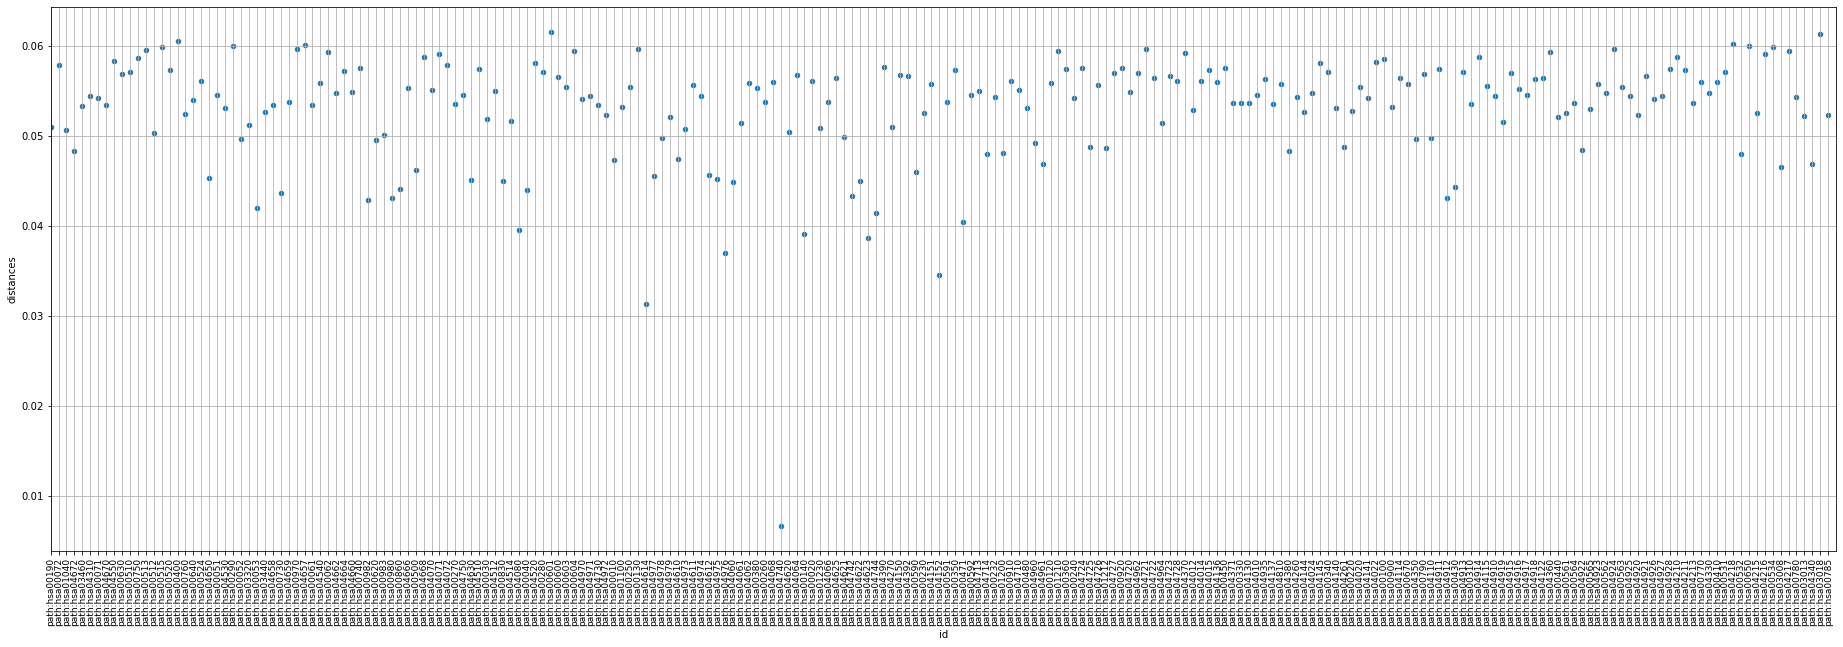

In [9]:
plotd = pdDistanceControlBasal.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumA

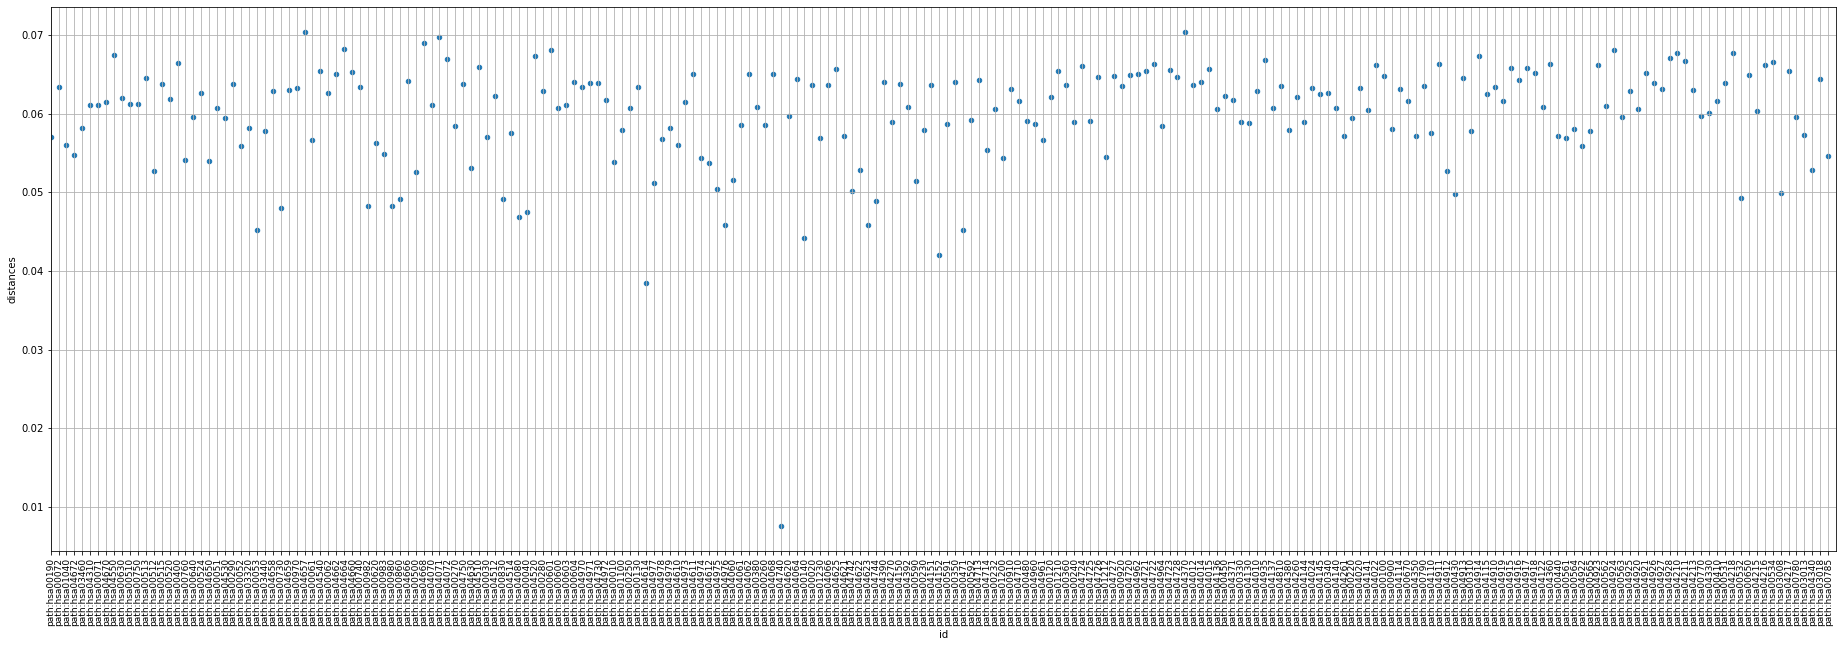

In [10]:
plotd = pdDistanceControlLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# control - LumB

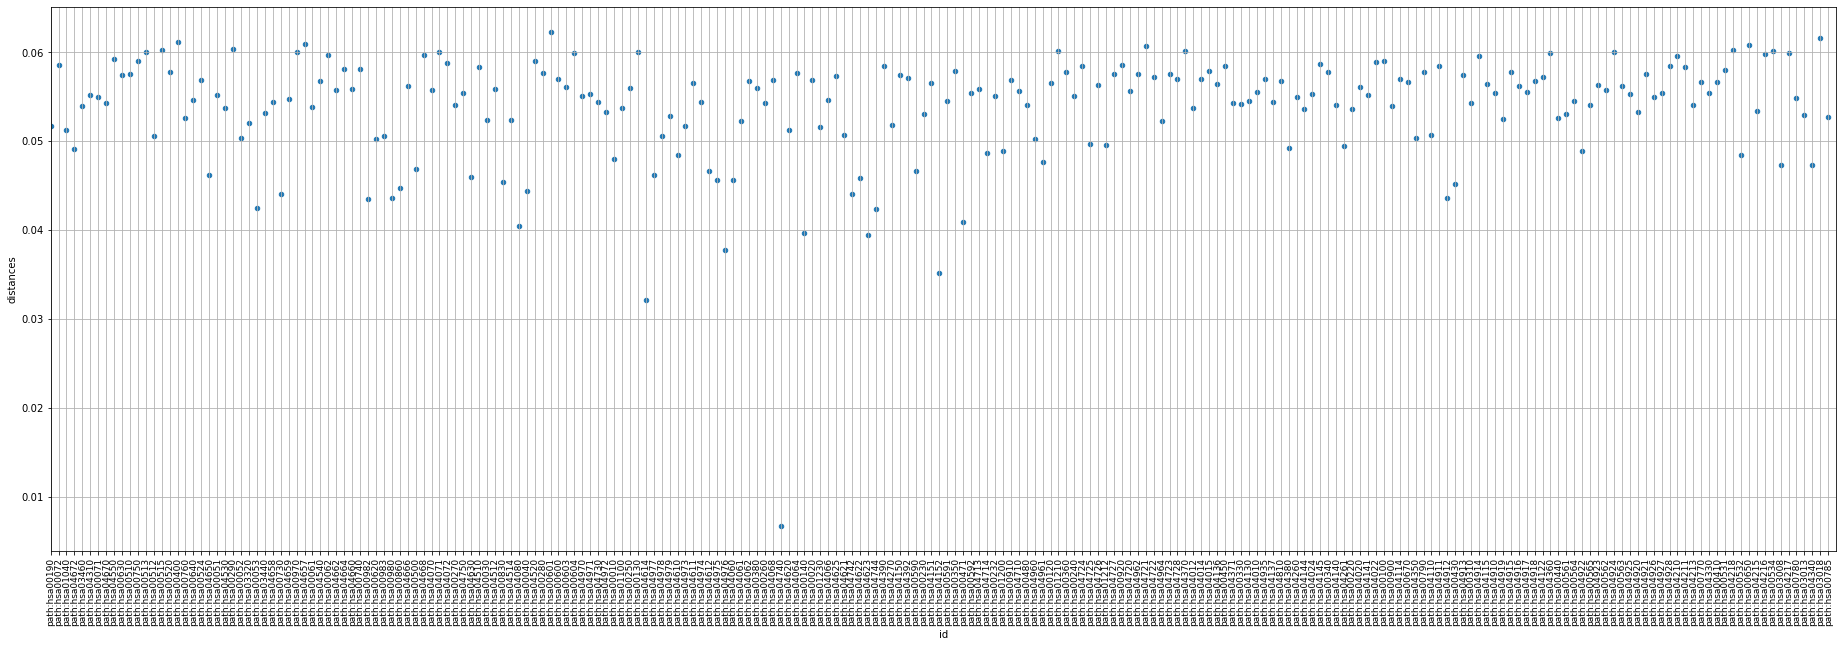

In [11]:
plotd = pdDistanceControlLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# controls distances plot

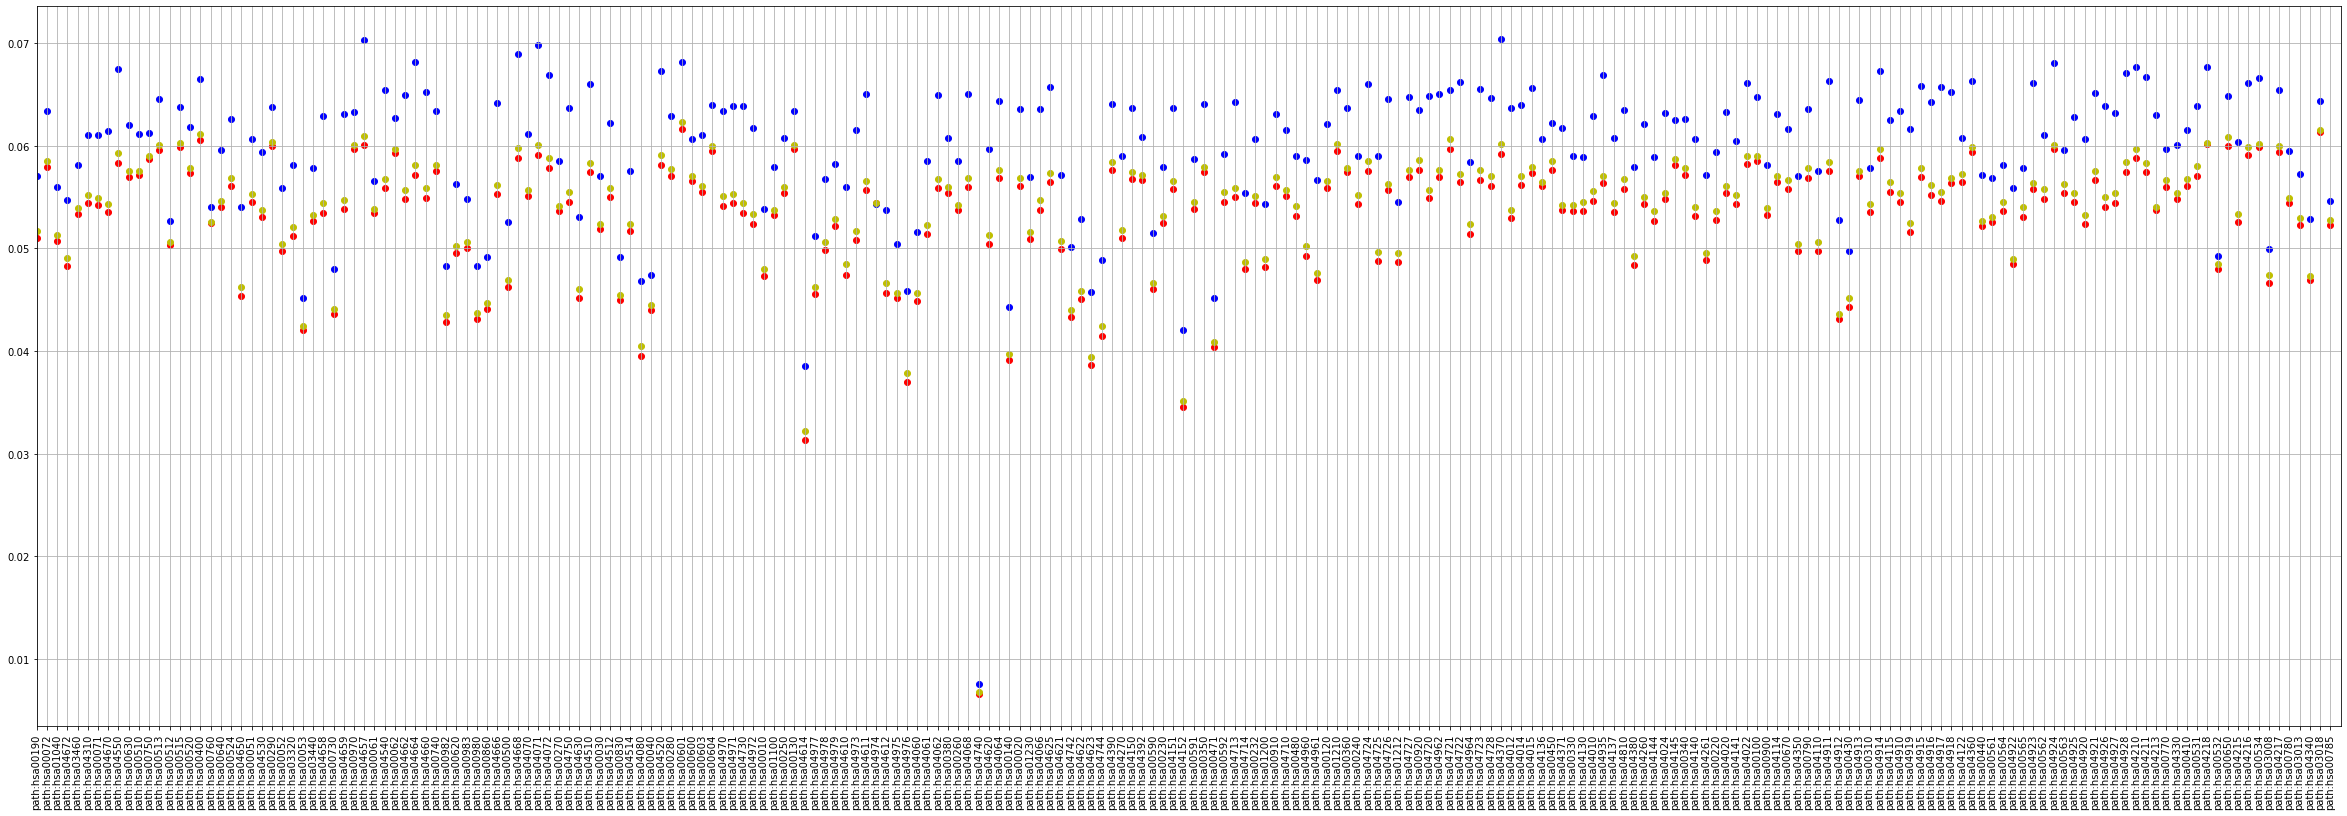

In [17]:
import itertools

ys = [pdDistanceControlBasal["distances"],
      pdDistanceControlLumA["distances"],
      pdDistanceControlLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])
plt.savefig('controlsVSLumA-LumB-Basal.png')

# LumA - LumB

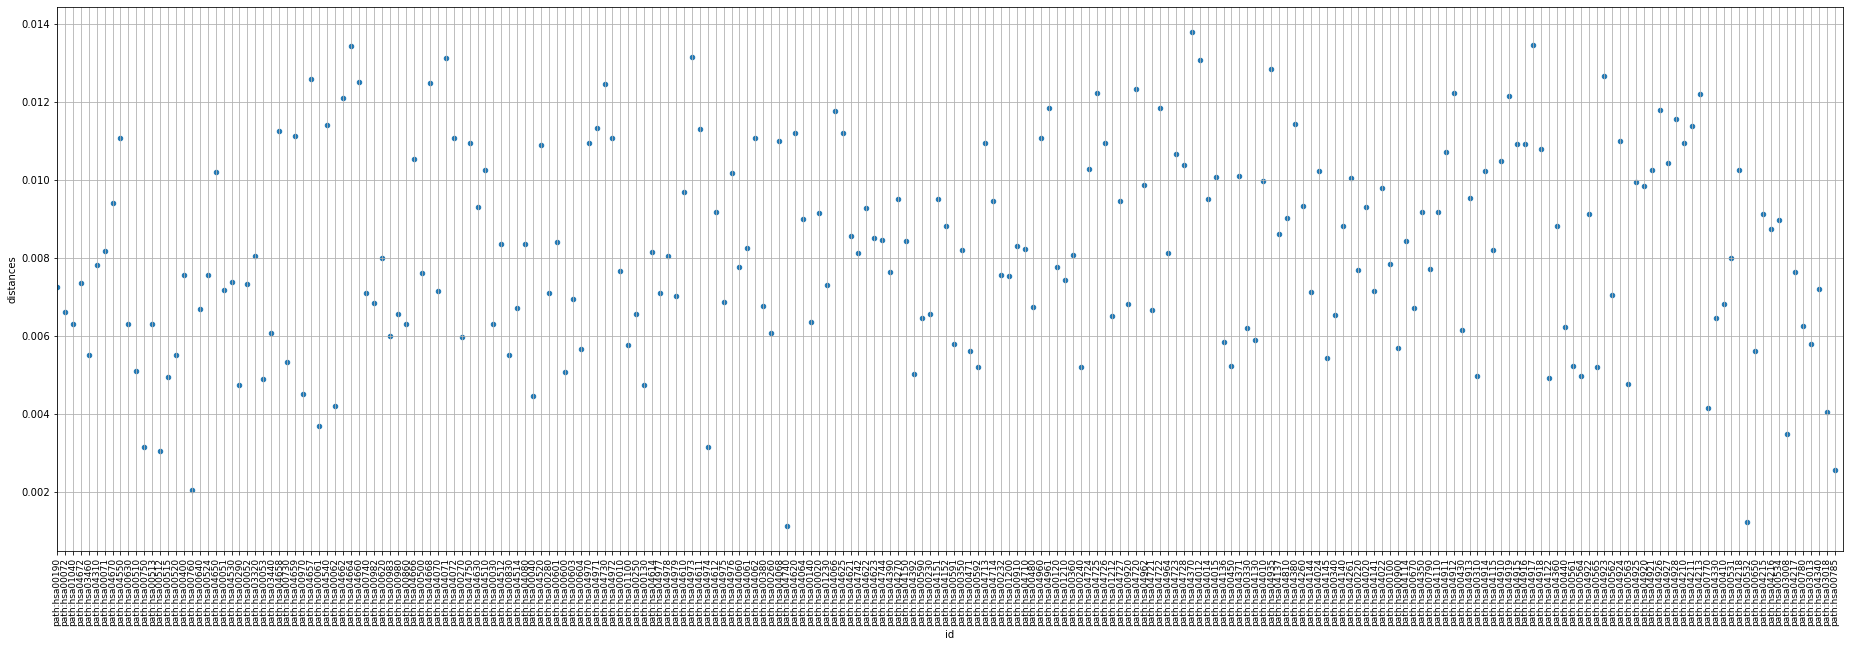

In [223]:
plotd = pdDistanceLumALumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumB

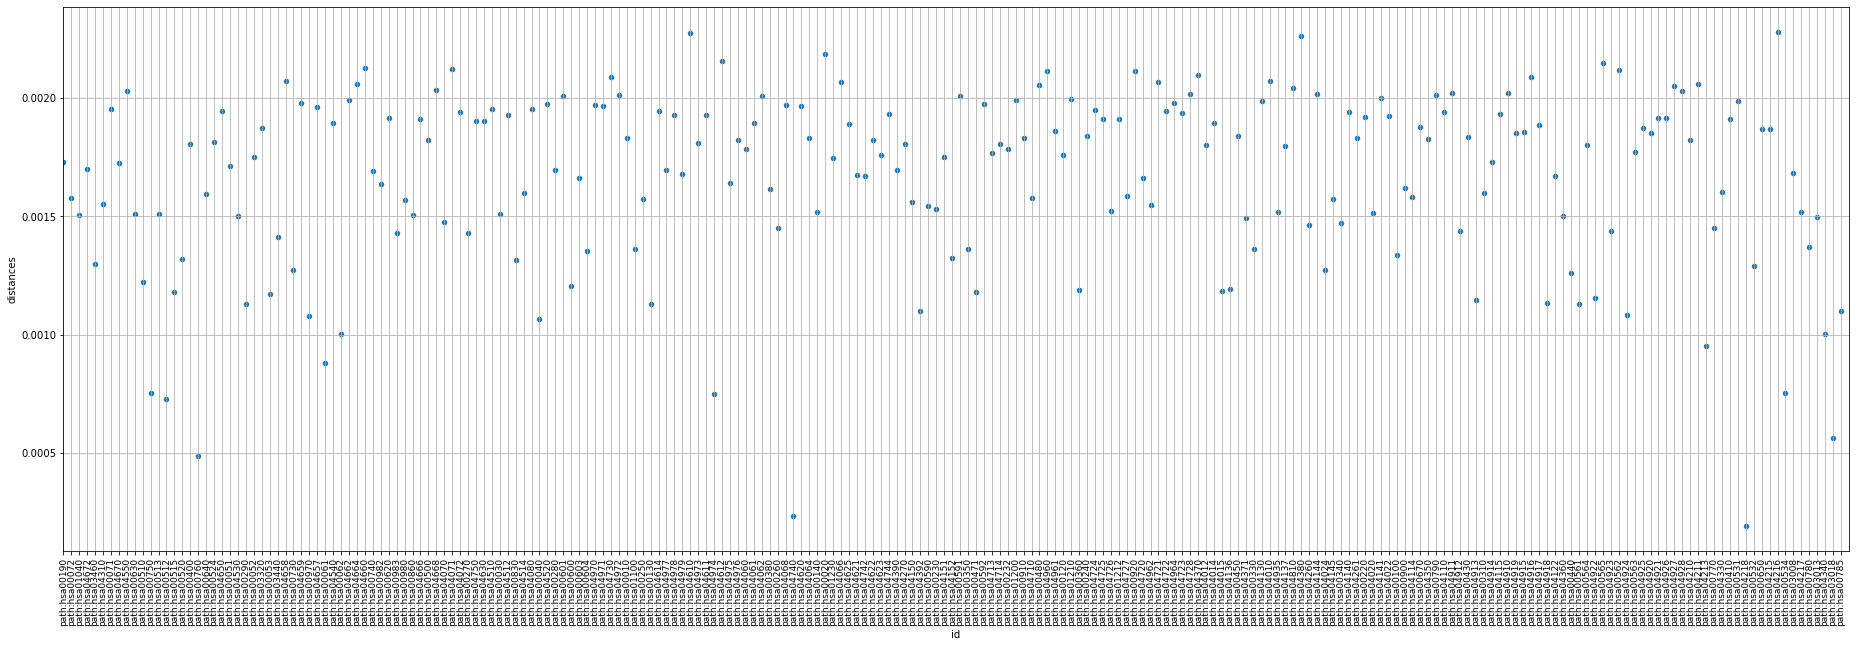

In [224]:
plotd = pdDistanceBasalLumB.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

# Basal - LumA

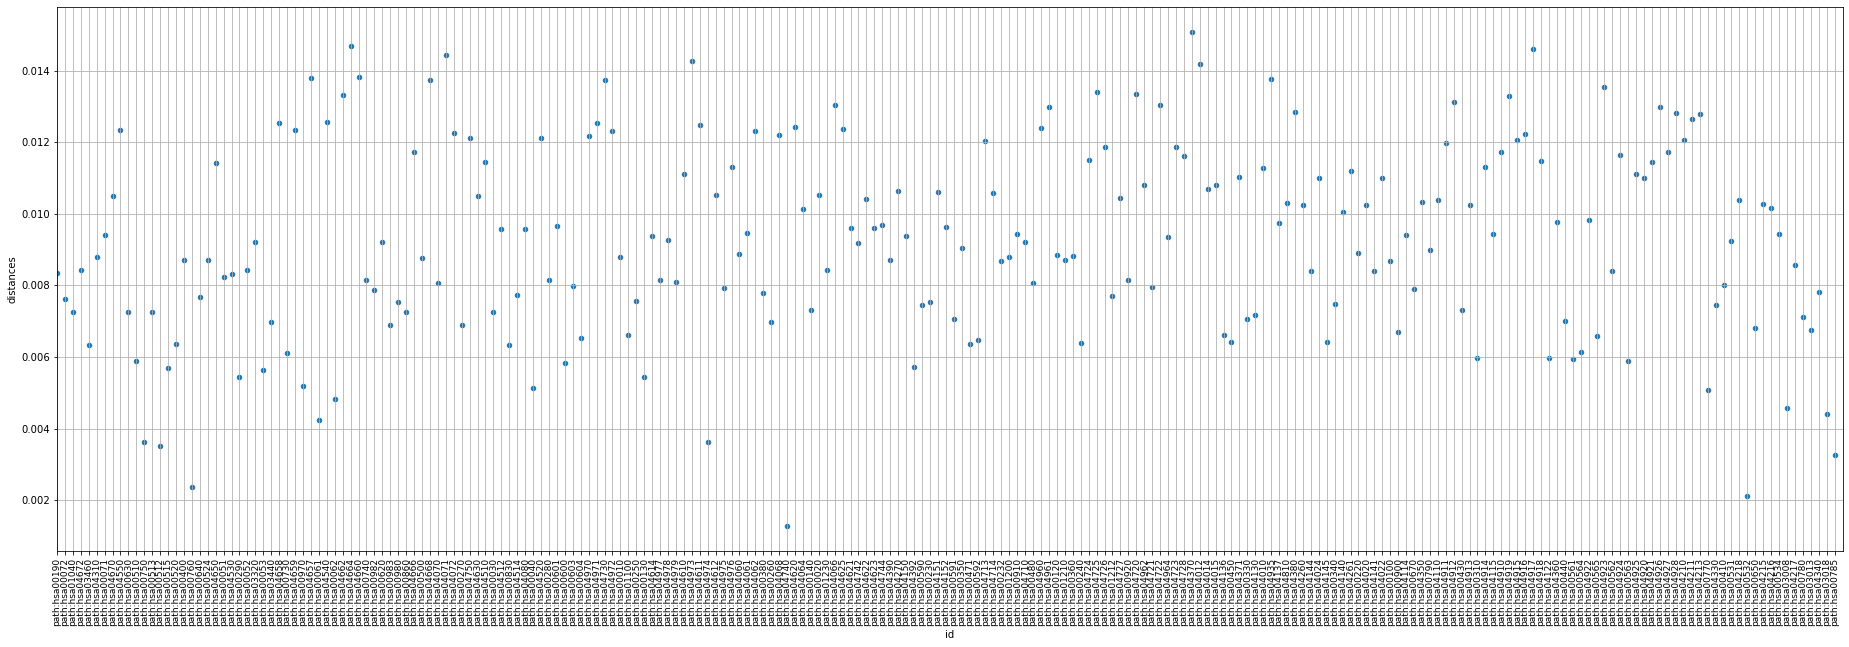

In [225]:
plotd = pdDistanceBasalLumA.plot(x="id",y="distances",kind='scatter',figsize=[32,10],grid=True,xticks=pdDistanceControlLumA["id"],rot=90)
plotd.set_xlim([0,225])
plotd.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plotd.tick_params(axis='x',labelsize=9)

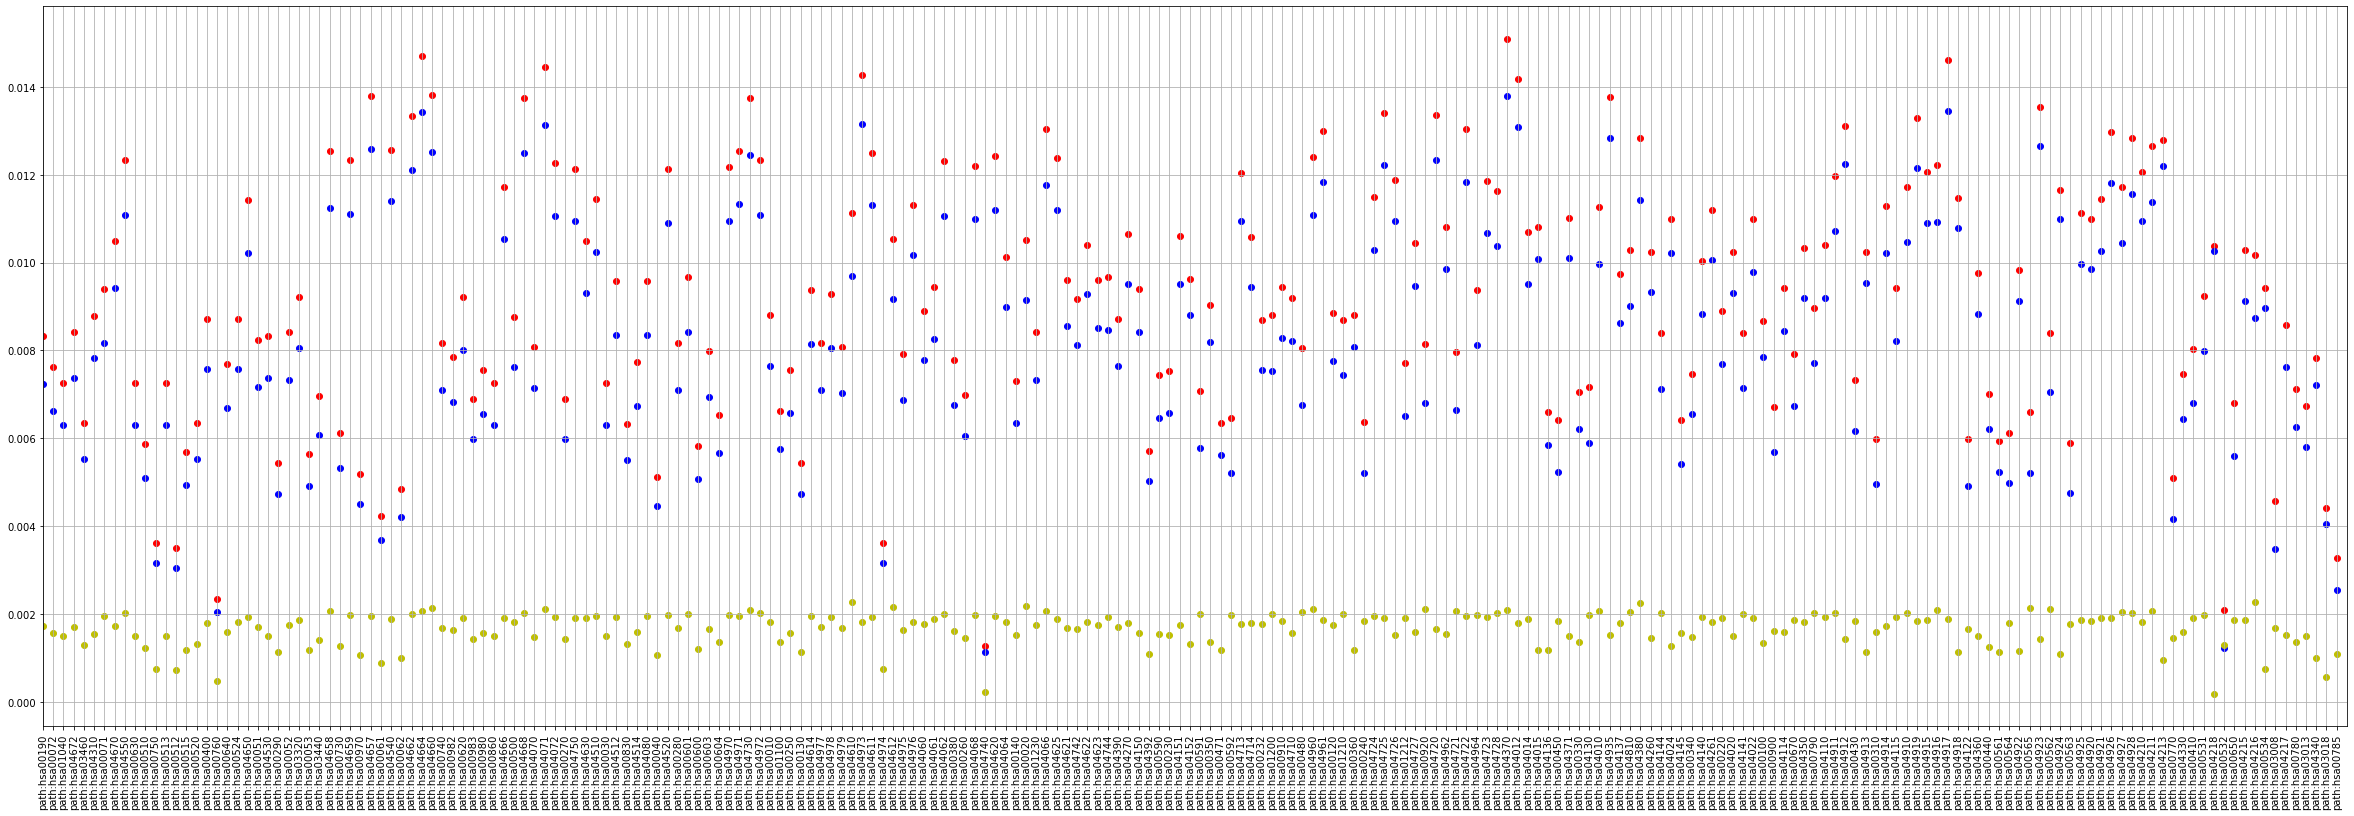

In [16]:

ys = [pdDistanceBasalLumA["distances"],
      pdDistanceLumALumB["distances"],
      pdDistanceBasalLumB["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])
plt.savefig('basalVSLumA-LumAVSLumB.png')

# LumA embeddings comparision for every set of 113 patients

In [19]:
LumAEmbeddingsWithId1 = pd.read_csv('pathwayEmbeddingsTumorLumA113-1.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered1 = LumAEmbeddingsWithId1[~LumAEmbeddingsWithId1['pathway_id'].isin(set(LumAEmbeddingsWithId1["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings1 = LumAEmbeddingsWithIdFiltered1.drop(["id","pathway_id"],axis=1)
tfLumAEmbeddings1 = tf.convert_to_tensor(LumAEmbeddings1)

LumAEmbeddingsWithId2 = pd.read_csv('pathwayEmbeddingsTumorLumA113-2.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered2 = LumAEmbeddingsWithId2[~LumAEmbeddingsWithId2['pathway_id'].isin(set(LumAEmbeddingsWithId2["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings2 = LumAEmbeddingsWithIdFiltered2.drop(["id","pathway_id"],axis=1)
tfLumAEmbeddings2 = tf.convert_to_tensor(LumAEmbeddings2)

LumAEmbeddingsWithId3 = pd.read_csv('pathwayEmbeddingsTumorLumA113-3.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered3 = LumAEmbeddingsWithId3[~LumAEmbeddingsWithId3['pathway_id'].isin(set(LumAEmbeddingsWithId3["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings3 = LumAEmbeddingsWithIdFiltered3.drop(["id","pathway_id"],axis=1)
tfLumAEmbeddings3 = tf.convert_to_tensor(LumAEmbeddings3)

LumAEmbeddingsWithId4 = pd.read_csv('pathwayEmbeddingsTumorLumA113-4.csv', sep=',', header=0).dropna()
LumAEmbeddingsWithIdFiltered4 = LumAEmbeddingsWithId4[~LumAEmbeddingsWithId4['pathway_id'].isin(set(LumAEmbeddingsWithId4["pathway_id"]).difference(set(controlEmbeddingsWithId["pathway_id"])))]
LumAEmbeddings4 = LumAEmbeddingsWithIdFiltered4.drop(["id","pathway_id"],axis=1)
tfLumAEmbeddings4 = tf.convert_to_tensor(LumAEmbeddings4)

In [20]:
LumAEmbeddings4

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,-0.000206,-0.000248,-0.000297,-0.000303,-0.000270,-0.000225,-0.000273,-0.000259,-0.000215,-0.000253,...,-0.000239,-0.000246,-0.000326,-0.000281,-0.000230,-0.000274,-0.000342,-0.000244,-0.000388,-0.000517
1,-0.000186,-0.000225,-0.000275,-0.000279,-0.000246,-0.000207,-0.000251,-0.000237,-0.000203,-0.000232,...,-0.000214,-0.000225,-0.000298,-0.000260,-0.000207,-0.000247,-0.000318,-0.000221,-0.000358,-0.000470
2,-0.000177,-0.000219,-0.000261,-0.000264,-0.000234,-0.000193,-0.000240,-0.000221,-0.000191,-0.000216,...,-0.000210,-0.000214,-0.000282,-0.000248,-0.000196,-0.000236,-0.000298,-0.000217,-0.000335,-0.000448
3,-0.000210,-0.000241,-0.000289,-0.000296,-0.000272,-0.000222,-0.000275,-0.000249,-0.000223,-0.000243,...,-0.000238,-0.000237,-0.000308,-0.000276,-0.000227,-0.000267,-0.000329,-0.000243,-0.000369,-0.000491
4,-0.000158,-0.000186,-0.000220,-0.000225,-0.000202,-0.000168,-0.000208,-0.000193,-0.000163,-0.000189,...,-0.000182,-0.000183,-0.000241,-0.000209,-0.000173,-0.000206,-0.000258,-0.000185,-0.000286,-0.000384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,-0.000162,-0.000196,-0.000234,-0.000242,-0.000212,-0.000179,-0.000217,-0.000206,-0.000170,-0.000201,...,-0.000187,-0.000196,-0.000259,-0.000222,-0.000179,-0.000216,-0.000275,-0.000191,-0.000309,-0.000411
222,-0.000187,-0.000211,-0.000254,-0.000259,-0.000238,-0.000194,-0.000242,-0.000219,-0.000191,-0.000214,...,-0.000211,-0.000210,-0.000272,-0.000241,-0.000199,-0.000236,-0.000292,-0.000213,-0.000326,-0.000436
223,-0.000118,-0.000145,-0.000175,-0.000177,-0.000156,-0.000129,-0.000158,-0.000151,-0.000125,-0.000145,...,-0.000139,-0.000143,-0.000191,-0.000163,-0.000132,-0.000159,-0.000199,-0.000144,-0.000226,-0.000301
224,-0.000066,-0.000082,-0.000098,-0.000100,-0.000088,-0.000071,-0.000091,-0.000085,-0.000070,-0.000081,...,-0.000079,-0.000080,-0.000107,-0.000093,-0.000074,-0.000089,-0.000113,-0.000082,-0.000127,-0.000168


In [21]:
distanceLumA12 = rows_distance(tfLumAEmbeddings1,tfLumAEmbeddings2)
pdDistanceLumA12 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA12.numpy()}) 
distanceLumA13 = rows_distance(tfLumAEmbeddings1,tfLumAEmbeddings3)
pdDistanceLumA13 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA13.numpy()}) 
distanceLumA14 = rows_distance(tfLumAEmbeddings1,tfLumAEmbeddings4)
pdDistanceLumA14 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA14.numpy()}) 

distanceLumA23 = rows_distance(tfLumAEmbeddings2,tfLumAEmbeddings3)
pdDistanceLumA23 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA23.numpy()}) 
distanceLumA24 = rows_distance(tfLumAEmbeddings2,tfLumAEmbeddings4)
pdDistanceLumA24 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA24.numpy()}) 

distanceLumA34 = rows_distance(tfLumAEmbeddings3,tfLumAEmbeddings4)
pdDistanceLumA34 = pd.DataFrame({'id':range(0,distanceControlsLumA.shape[0]),
                      'distances':distanceLumA34.numpy()}) 

## LumA 1-113 vs 113-452

(0.0, 225.0)

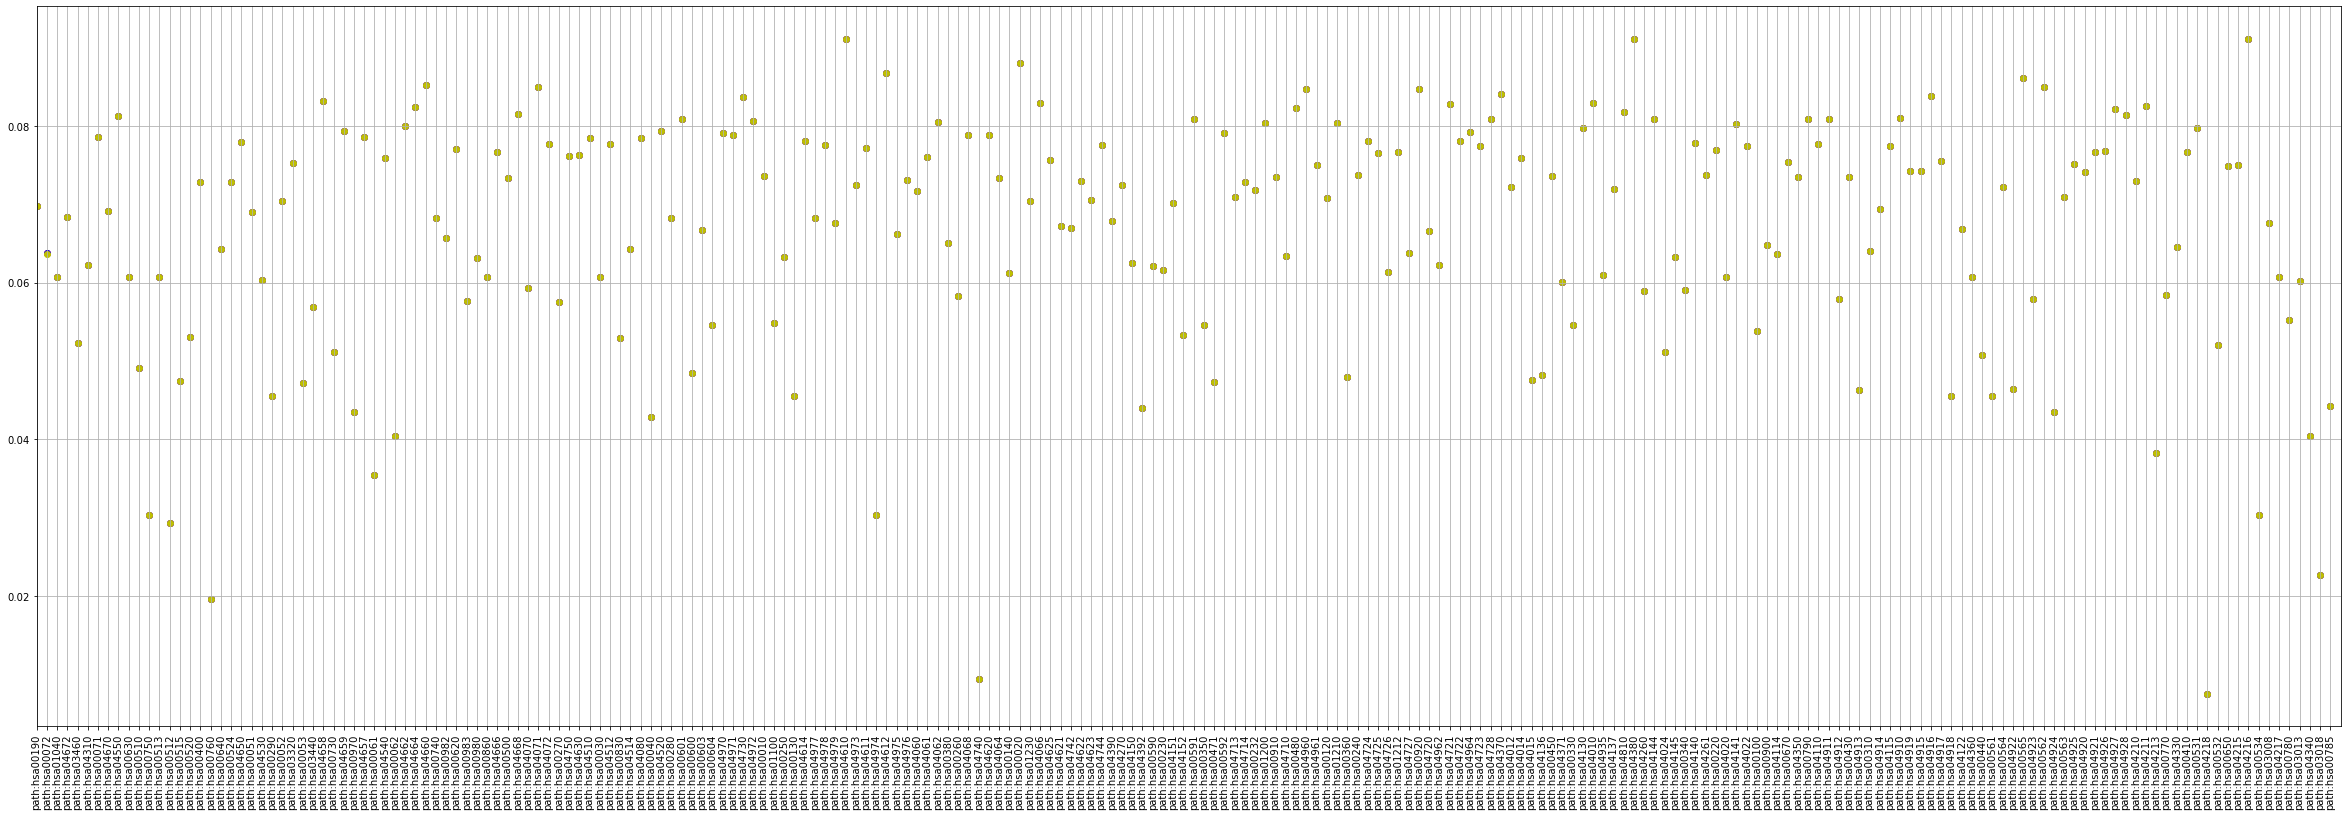

In [22]:
ys = [pdDistanceLumA12["distances"],
      pdDistanceLumA13["distances"],
      pdDistanceLumA14["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])

## LumA 113-226 vs 226-452 & 226-339 vs 339-452 

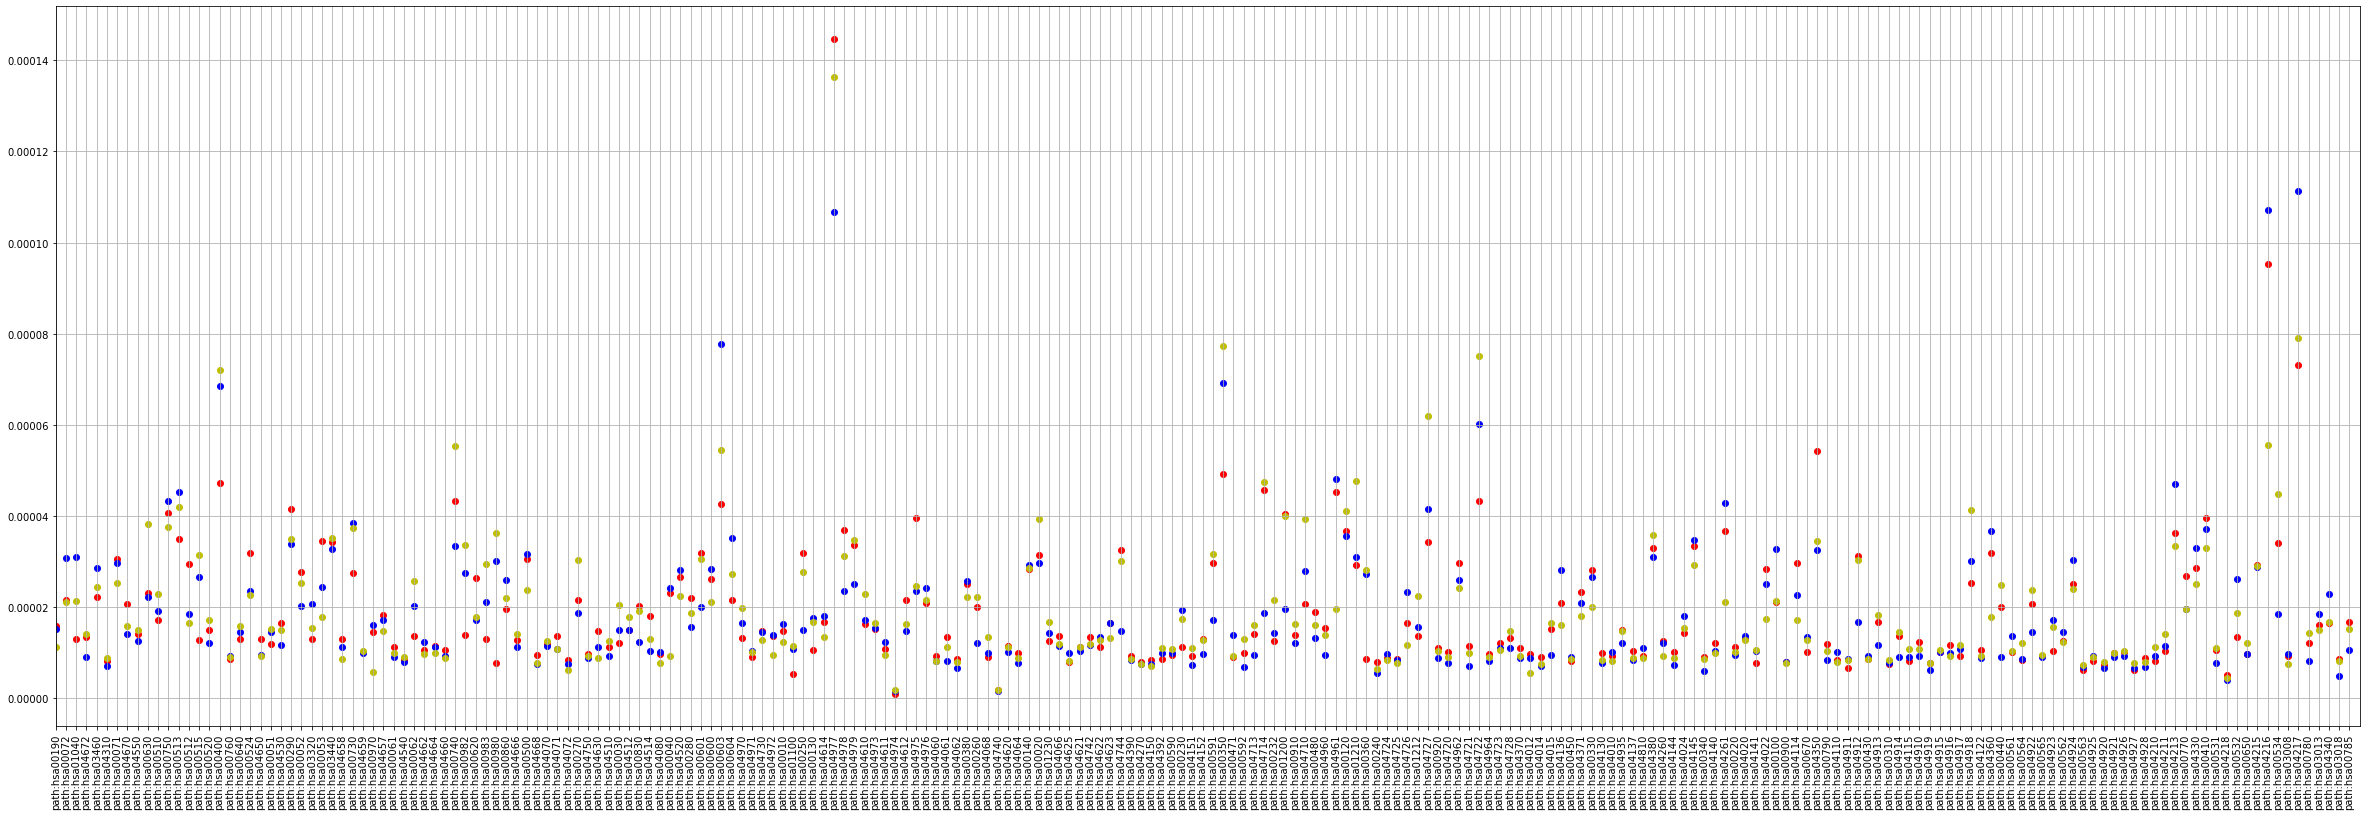

In [23]:
ys = [pdDistanceLumA23["distances"],
      pdDistanceLumA24["distances"],
      pdDistanceLumA34["distances"]]

colors = itertools.cycle(["r", "b", "y"])
fig = plt.figure(figsize=[32,10])
ax=fig.add_axes([0,0,1,1])
for y in ys:
    ax.scatter(pdDistanceControlLumA["id"], y, color=next(colors))
ax.grid(which="both")
plt.xticks(pdDistanceControlLumA["id"])
ax.set_xticklabels(basalEmbeddingsWithIdFiltered["pathway_id"], rotation=90)
plt.xlim([0,225])
plt.savefig('LumAVSLumA.png')